In [1]:
#Basic Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# #ML Library
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("brain_stroke.csv")
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [3]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 428.2+ KB


In [5]:
# Step 3: Identify categorical columns
categorical_columns = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

In [6]:
df.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,ever_married_Yes,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,228.69,36.6,1,True,True,True,False,False,True,True,False,False
1,80.0,0,1,105.92,32.5,1,True,True,True,False,False,False,False,True,False
2,49.0,0,0,171.23,34.4,1,False,True,True,False,False,True,False,False,True
3,79.0,1,0,174.12,24.0,1,False,True,False,True,False,False,False,True,False
4,81.0,0,0,186.21,29.0,1,True,True,True,False,False,True,True,False,False


In [7]:
df.shape

(4981, 15)

In [8]:
df.columns

Index(['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi',
       'stroke', 'gender_Male', 'ever_married_Yes', 'work_type_Private',
       'work_type_Self-employed', 'work_type_children', 'Residence_type_Urban',
       'smoking_status_formerly smoked', 'smoking_status_never smoked',
       'smoking_status_smokes'],
      dtype='object')

In [9]:
# Step 4: Define your target column (y) and drop it from the DataFrame to get features (X)
target_column = 'stroke'  # target column name
y = df['stroke']
X = df.drop(columns=['stroke'])

In [10]:
# Step 5: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Decision tree

Accuracy: 0.91
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.96      0.95       943
           1       0.21      0.20      0.21        54

    accuracy                           0.91       997
   macro avg       0.58      0.58      0.58       997
weighted avg       0.91      0.91      0.91       997



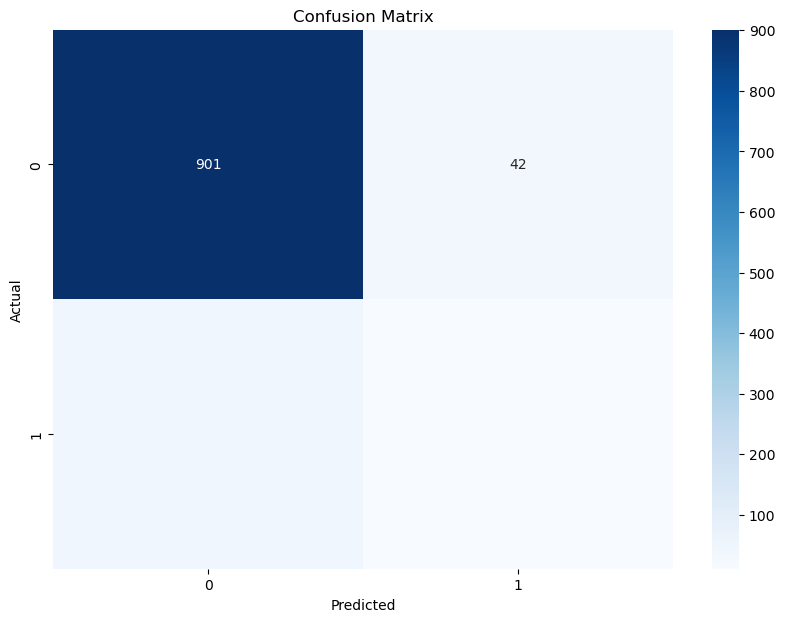

In [11]:
# Step 6: Train a Decision Tree classifier on the training data
DT_clf = DecisionTreeClassifier(random_state=42)
DT_clf.fit(X_train, y_train)

# Step 7: Evaluate the classifier on the testing data
y_pred = DT_clf.predict(X_test)

# Step 8: Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Step 9: Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Step 10a: Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Step 10b: Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=DT_clf.classes_, yticklabels=DT_clf.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

This shows 91% accuracy with 901 true positive data.

# Random forest

Accuracy: 0.94
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       943
           1       0.00      0.00      0.00        54

    accuracy                           0.94       997
   macro avg       0.47      0.50      0.48       997
weighted avg       0.89      0.94      0.92       997



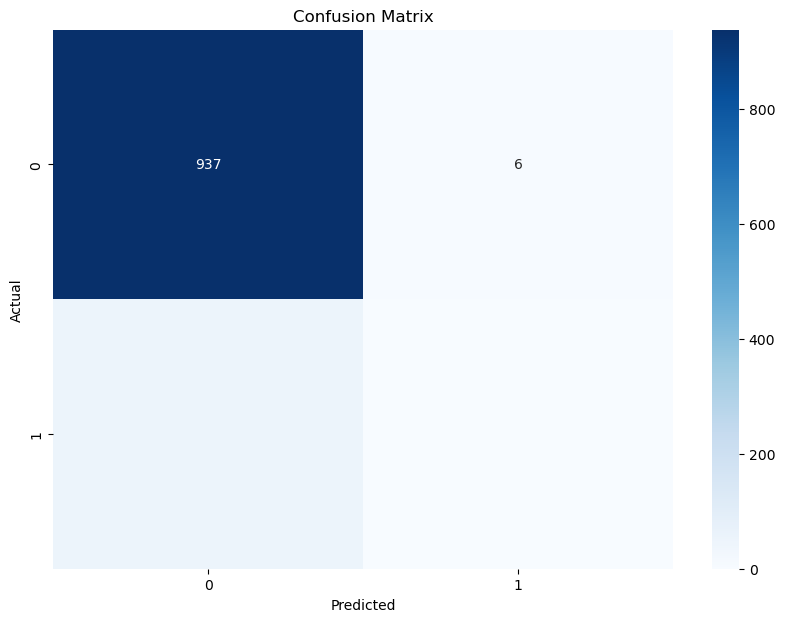

In [12]:

from sklearn.ensemble import RandomForestClassifier


# Step 6: Train a Random Forest classifier on the training data
RF_clf = RandomForestClassifier(random_state=42)
RF_clf.fit(X_train, y_train)

# Step 7:Evaluate the classifier on the testing data
y_pred = RF_clf.predict(X_test)

# Step 8:Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Step 69 Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Step 10a:Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Step 10b: Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=RF_clf.classes_, yticklabels=RF_clf.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

This shows 94% accuracy with 937 true positive data.

# SVM

Accuracy: 0.95
Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       943
           1       0.00      0.00      0.00        54

    accuracy                           0.95       997
   macro avg       0.47      0.50      0.49       997
weighted avg       0.89      0.95      0.92       997



C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


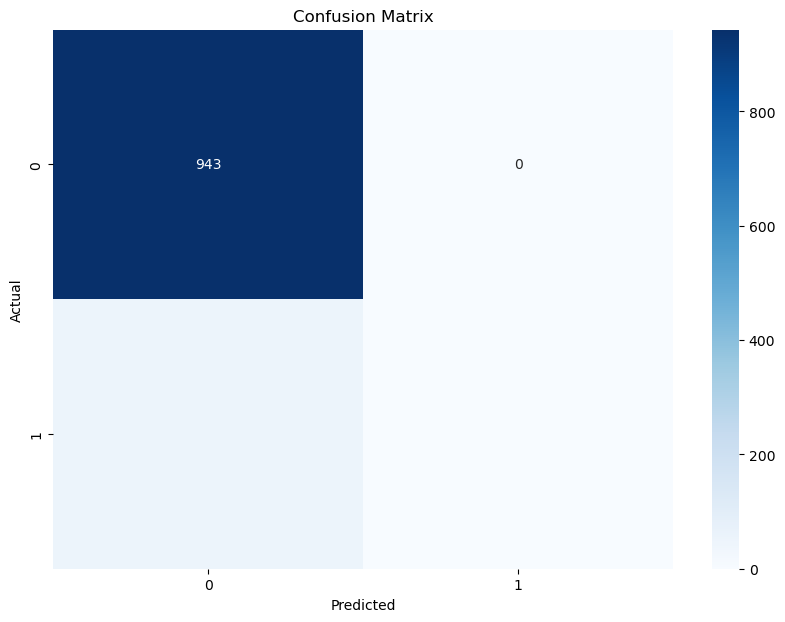

In [15]:
from sklearn.svm import SVC

# Step 6: Train an SVM classifier on the training data
SVM_clf = SVC(probability=True, random_state=42)
SVM_clf.fit(X_train, y_train)

# Step 7: Evaluate the classifier on the testing data
y_pred = SVM_clf.predict(X_test)

# Step 8: Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

#Step 9: Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

#Step 10a: Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

#Step 10b: Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=SVM_clf.classes_, yticklabels=SVM_clf.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

This shows 95% accuracy with 943 true positive data.

# KNeighborsClassifier

Accuracy: 0.94
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       943
           1       0.17      0.02      0.03        54

    accuracy                           0.94       997
   macro avg       0.56      0.51      0.50       997
weighted avg       0.90      0.94      0.92       997



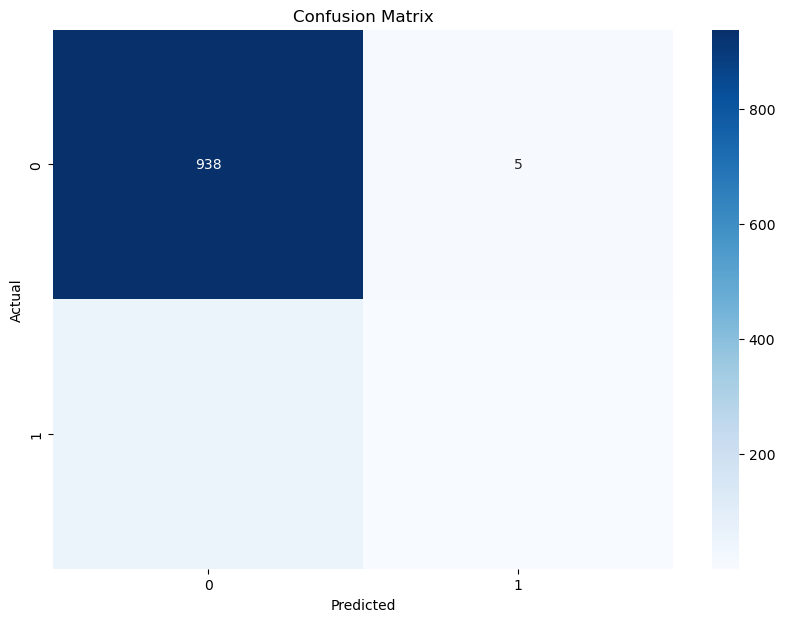

In [16]:
from sklearn.neighbors import KNeighborsClassifier

# Step 6; Train a KNN classifier on the training data
KNN_clf = KNeighborsClassifier(n_neighbors=5)
KNN_clf.fit(X_train, y_train)

# Step 7;Evaluate the classifier on the testing data
y_pred = KNN_clf.predict(X_test)

# Step 8;Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Step 9;Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Step 10a;Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Step 10bb: Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

This shows 94% accuracy with 938 true positive data.

Among the classification algorithms mentioned above, we can say that SVM with 95% accuracy, is best and effective for this dataset.